In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import LSTM, Embedding, Dense, SpatialDropout1D
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.callbacks import EarlyStopping

In [15]:
data = pd.read_csv("dataset/clean_rks.csv")

In [16]:
# Preprocessing teks
max_features = 1000  # Jumlah kata unik yang akan digunakan
tokenizer = Tokenizer(num_words=max_features, split=" ")
tokenizer.fit_on_texts(data["txt"].values)
X = tokenizer.texts_to_sequences(data["txt"].values)
X = pad_sequences(X)

In [17]:
# Preprocessing label
label_encoder = LabelEncoder()
Y = label_encoder.fit_transform(data["label"])

In [18]:
# Split data menjadi data latih dan data uji
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)

In [19]:
X_train.shape, X_test.shape

((256, 76), (64, 76))

In [20]:
len(Y_test == 0), len(Y_test == 1)

(64, 64)

In [27]:
# Model LSTM
embedding_dim = 256
lstm_out = 196

model = Sequential()
model.add(Embedding(max_features, embedding_dim, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation="sigmoid"))
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [28]:
# EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', 
                           patience=8, 
                           verbose=1, 
                           restore_best_weights=True)

In [29]:
# Training model
batch_size = 64
epochs = 50
history = model.fit(
    X_train,
    Y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(X_test, Y_test),
    callbacks=[early_stop],
    )

Epoch 1/50
4/4 [==============================] - 2s 270ms/step - loss: 0.6935 - accuracy: 0.5078 - val_loss: 0.6855 - val_accuracy: 0.6250
Epoch 2/50
4/4 [==============================] - 1s 146ms/step - loss: 0.6754 - accuracy: 0.8242 - val_loss: 0.6730 - val_accuracy: 0.8750
Epoch 3/50
4/4 [==============================] - 1s 145ms/step - loss: 0.6450 - accuracy: 0.9180 - val_loss: 0.6398 - val_accuracy: 0.8750
Epoch 4/50
4/4 [==============================] - 1s 143ms/step - loss: 0.5910 - accuracy: 0.8672 - val_loss: 0.5892 - val_accuracy: 0.6562
Epoch 5/50
4/4 [==============================] - 1s 148ms/step - loss: 0.5013 - accuracy: 0.8438 - val_loss: 0.5610 - val_accuracy: 0.7812
Epoch 6/50
4/4 [==============================] - 1s 149ms/step - loss: 0.4475 - accuracy: 0.9219 - val_loss: 0.5137 - val_accuracy: 0.7812
Epoch 7/50
4/4 [==============================] - 1s 148ms/step - loss: 0.3673 - accuracy: 0.9219 - val_loss: 0.4473 - val_accuracy: 0.7969
Epoch 8/50
4/4 [====

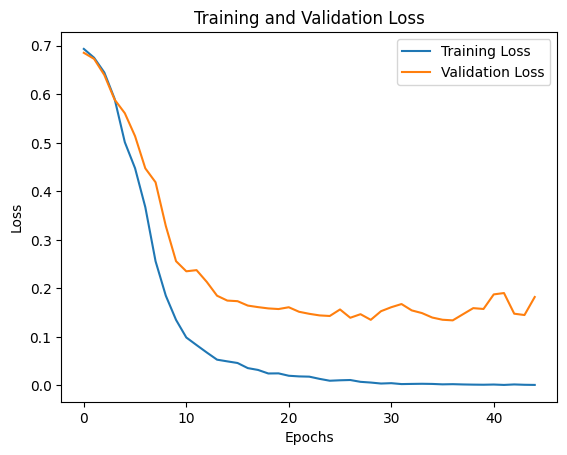

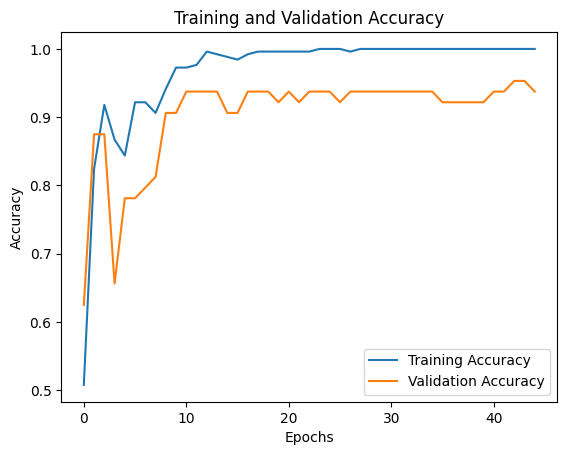

In [30]:
# Visualisasi Loss dan Akurasi
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.plot(history.history["accuracy"], label="Training Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [31]:
# Evaluasi model pada data uji
loss, accuracy = model.evaluate(X_test, Y_test)
print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')

2/2 [==============================] - 0s 21ms/step - loss: 0.1340 - accuracy: 0.9219
Loss: 0.1339530050754547
Accuracy: 0.921875


In [34]:
import json

# Simpan riwayat pelatihan ke file JSON
with open('model/training_history.json', 'w') as file:
    json.dump(history.history, file)

# Simpan model ke file
# save model
model.save("model/saved_model/", save_format="tf")
model.save_weights("model/model_weights.h5")

INFO:tensorflow:Assets written to: model/saved_model/assets


INFO:tensorflow:Assets written to: model/saved_model/assets
